<a href="https://colab.research.google.com/github/aayushbhurtel/Data_Visualization/blob/main/Exam1_Aayush_Bhurtel_CPSMA_4313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization
# Exam 1
## Aayush Bhurtel
## CPSMA 4313

I am loading all libraries in this block of code.

In [114]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from tabulate import tabulate

REFERENCES:

here, I am going to grab a mountains data from a wiki table.

now I am going to grab a table of mountain over 8000 meters using the class name of that table.

#(a) (10 points) Store the data as a pandas dataframe

In [44]:
raw_data = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
contents = raw_data.text
soup = BeautifulSoup(contents,"lxml")

In [30]:
soup.title

<title>List of mountains by elevation - Wikipedia</title>

In [56]:
tables = soup.find_all('table',class_="wikitable")
tables[0].find_all('a')
df = pd.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


# (b) (10 points) Return only mountains in the ‘Himalayas’

In [46]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8848,29029,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


# (c) (10 points) Create a barchart of the Ranges

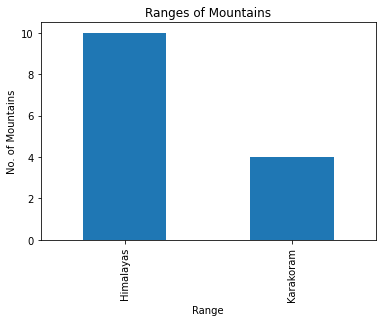

In [90]:
dfplot = df.groupby(['Range'])['Range'].count()
dfplot.plot(kind="bar", title = 'Ranges of Mountains' , ylabel = 'No. of Mountains')

# (d) (10 points) Create a box-plot of the height in Feet

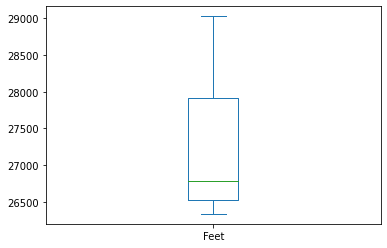

In [94]:
df.Feet.plot(kind='box')

# (e) (10 points) Report the mean, standard deviation and five number summary of the height in Feet


In [96]:
df.Feet.describe()

count       14.000000
mean     27178.000000
std        879.489537
min      26335.000000
25%      26518.000000
50%      26788.000000
75%      27914.500000
max      29029.000000
Name: Feet, dtype: float64

# (f) (10 points) Report the mean and median of mountains when grouped by their Range.

In [105]:
mean = df.groupby('Range').mean()
median = df.groupby('Range').median()

In [136]:
print(tabulate(mean, headers=["Range", "Metres (mean)", "Feet (mean)"], tablefmt="pretty"))
print(tabulate(median, headers=["Range", "Metres (median)", "Feet (median)"], tablefmt="pretty"))



+-----------+---------------+-------------+
|   Range   | Metres (mean) | Feet (mean) |
+-----------+---------------+-------------+
| Himalayas |    8319.7     |   27295.6   |
| Karakoram |    8194.25    |   26884.0   |
+-----------+---------------+-------------+
+-----------+-----------------+---------------+
|   Range   | Metres (median) | Feet (median) |
+-----------+-----------------+---------------+
| Himalayas |     8177.5      |    26829.5    |
| Karakoram |     8065.5      |    26461.5    |
+-----------+-----------------+---------------+
